### This project involves predicting the price of houses using the information provided by the dataset. Prediction involves many approach of regression methods.

In [1]:
# Importing the relevant libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
sns.set()

In [2]:
# Importing the dataset
df = pd.read_csv('kc_house_data.csv')
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


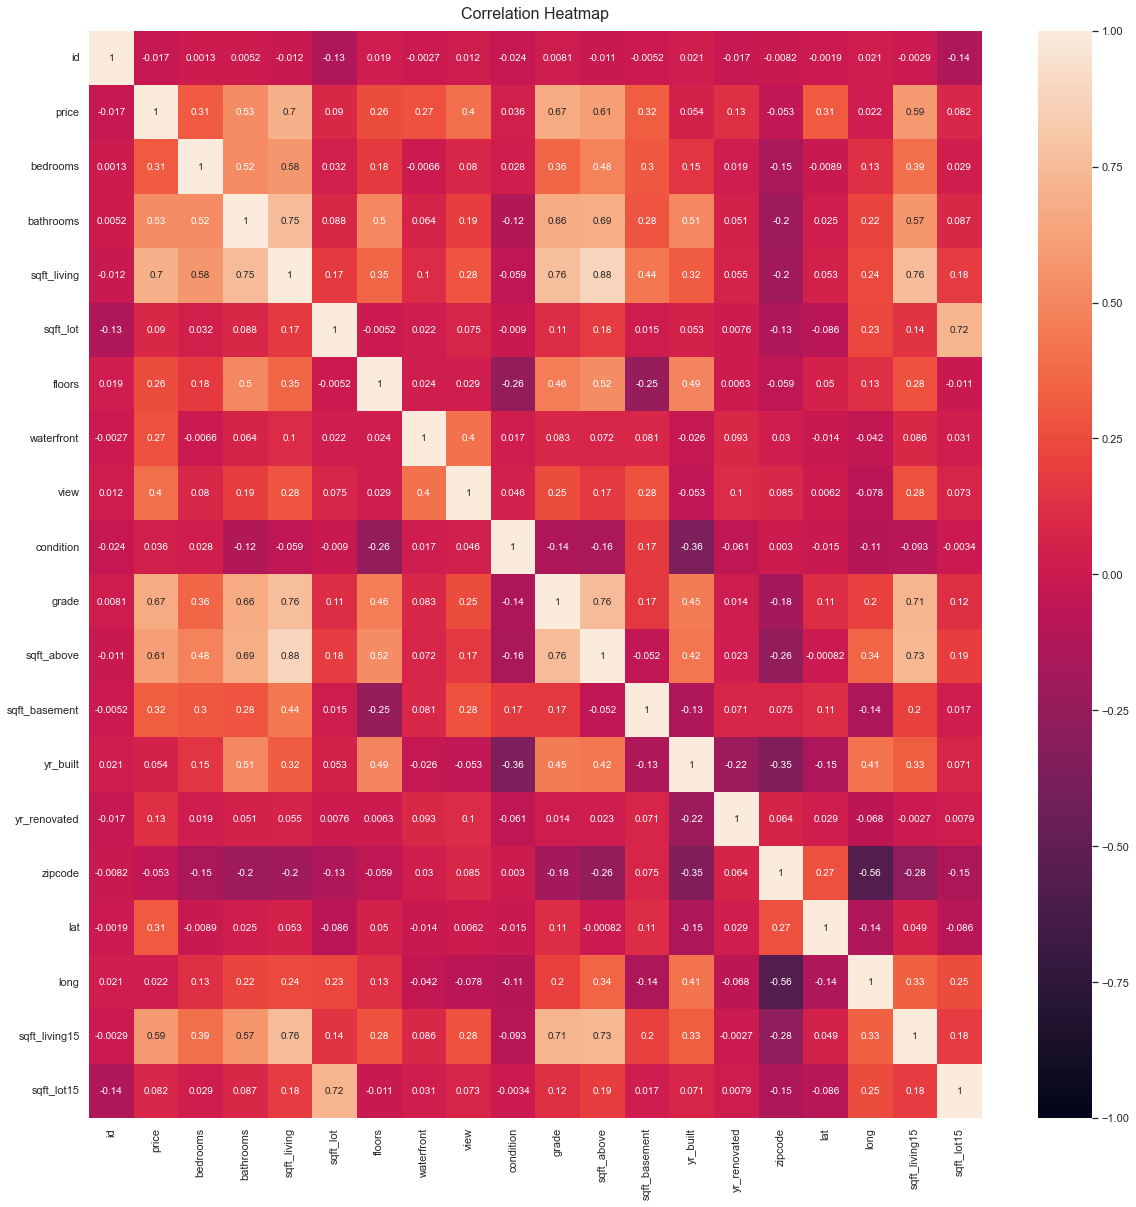

In [3]:
# Plotting the Numerical Features Correlation Heatmap 
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

In [4]:
# Dropping ID and date column
df_no_identifiers = df.drop(columns = ['id', 'date', 'zipcode']) 

In [5]:
# Defining a function which will remove redundant numerical features 
def correlation_drop(dataframe, threshold):
    col_corr    = set()
    corr_matrix = dataframe.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [6]:
# Dropping over-correlated features
corr_features             = correlation_drop(df_no_identifiers, 0.8)
df_no_correlated_features = df_no_identifiers.drop(corr_features, axis = 1)
df_no_correlated_features.describe(include = 'all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


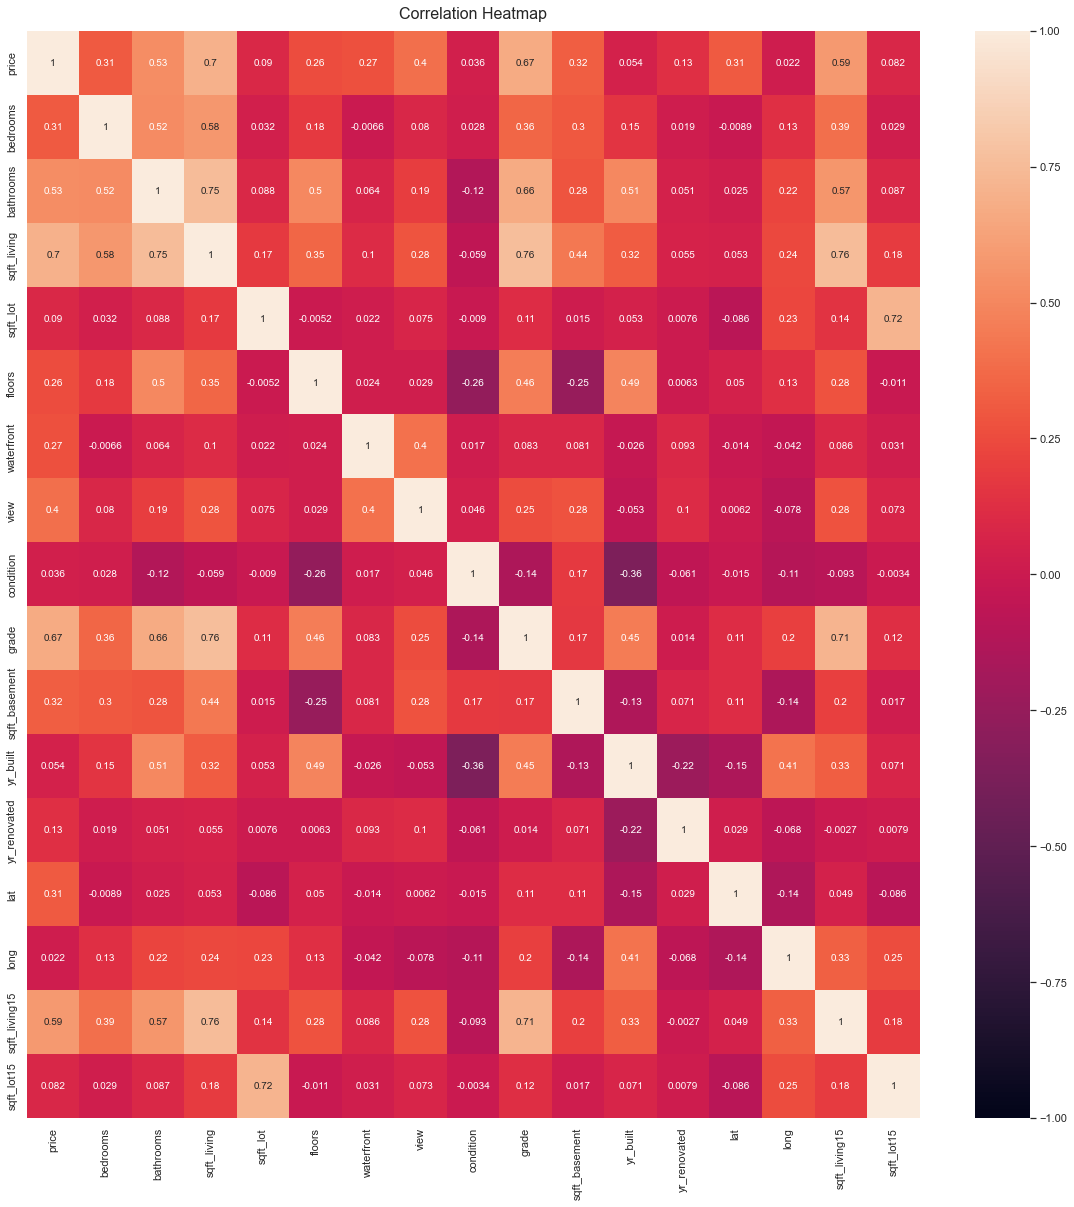

In [7]:
# Plotting the Numerical Features Correlation Heatmap 
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df_no_correlated_features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

In [8]:
# Converting year to house age
df_no_correlated_features['house_age'] = 2022 - df_no_correlated_features['yr_built']

# Converting whether a house is renovated or not
def renovated(year):
    if year == 0:
        return 0
    else:
        return 1

df_no_correlated_features['flag_renovated'] = df_no_correlated_features['yr_renovated'].apply(renovated)
df_no_correlated_features

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,flag_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650,67,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639,71,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062,89,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000,57,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,47.6993,-122.346,1530,1509,13,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,47.5107,-122.362,1830,7200,8,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,47.5944,-122.299,1020,2007,13,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,47.5345,-122.069,1410,1287,18,0


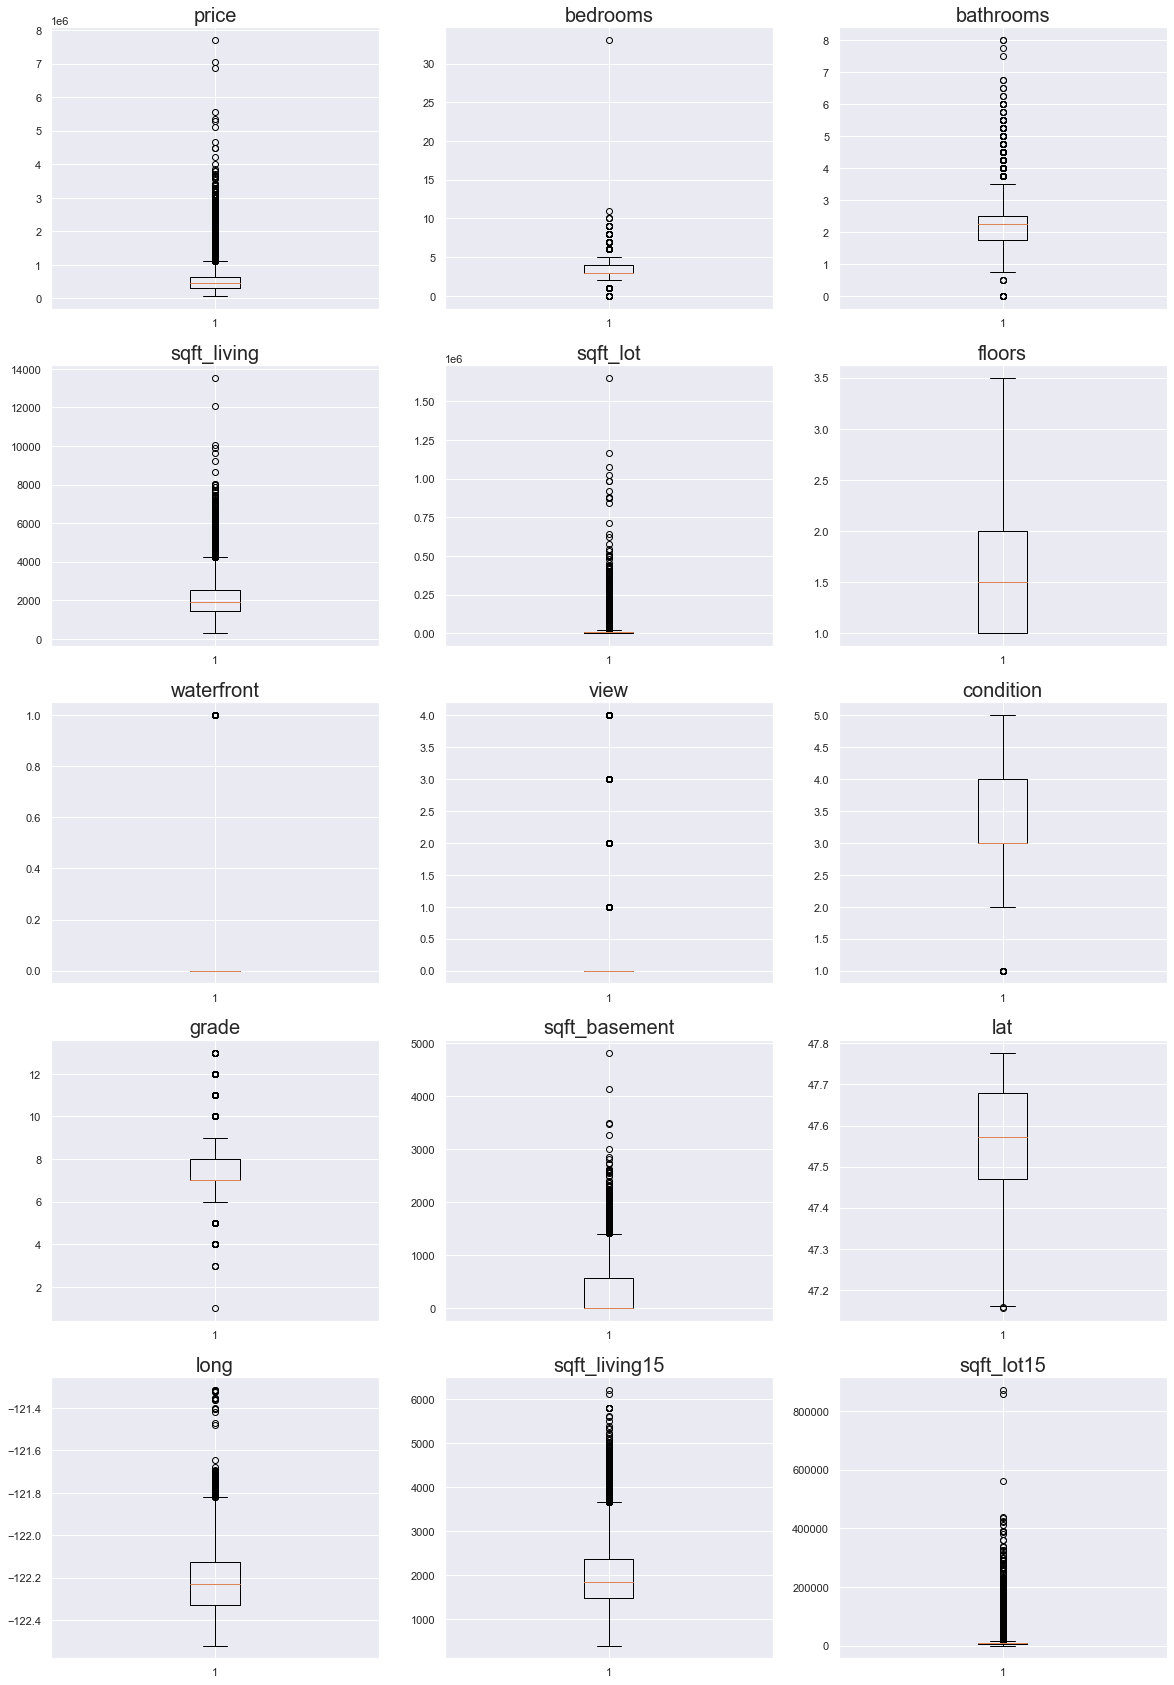

In [9]:
# Identifying outliers
df_cleaned1 = df_no_correlated_features.drop(columns = ['yr_built', 'yr_renovated', 'house_age', 'flag_renovated'])

n_cols    = 3
n_rows    = int(np.ceil(len(df_cleaned1.columns)/n_cols))
fig, axes = plt.subplots(ncols = n_cols, nrows = n_rows, figsize=(20, 30))

for i, column in enumerate(df_cleaned1.columns):
    axes[i//n_cols,i%n_cols].boxplot(df[column])
    axes[i//n_cols,i%n_cols].set_title(column, fontsize = 20)
plt.show()

In [10]:
# Removing outliers from the numerical features
from scipy import stats
df_numerical_features = df_cleaned1.columns.values.tolist()

df_no_outliers = df_no_correlated_features[(np.abs(stats.zscore(df_cleaned1[df_numerical_features])) < 5).all(axis=1)]
df_no_outliers.reset_index(drop = True)
df_no_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,flag_renovated
count,2.101000e+04,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.0,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000,21010.000000
mean,5.182672e+05,3.361066,2.094372,2042.050738,11410.842599,1.489672,0.0,0.195574,3.409948,7.623798,283.511423,1970.894336,79.803617,47.560860,-122.216549,1966.878962,10124.522180,51.105664,0.039981
std,2.933333e+05,0.890153,0.742337,849.293792,17703.115014,0.539935,0.0,0.679679,0.649847,1.130339,426.269574,29.370748,391.075176,0.138198,0.136761,664.832848,12349.070485,29.370748,0.195919
min,7.500000e+04,0.000000,0.000000,370.000000,520.000000,1.000000,0.0,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,47.155900,-122.515000,460.000000,651.000000,7.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,47.473000,-122.329000,1480.000000,5060.000000,25.000000,0.000000
50%,4.474750e+05,3.000000,2.250000,1900.000000,7500.000000,1.500000,0.0,0.000000,3.000000,7.000000,0.000000,1974.000000,0.000000,47.572300,-122.233000,1820.000000,7540.000000,48.000000,0.000000
75%,6.310000e+05,4.000000,2.500000,2510.000000,10297.000000,2.000000,0.0,0.000000,4.000000,8.000000,550.000000,1997.000000,0.000000,47.678600,-122.129000,2340.000000,9875.000000,71.000000,0.000000
max,2.375000e+06,8.000000,5.750000,6640.000000,222156.000000,3.500000,0.0,4.000000,5.000000,13.000000,2500.000000,2015.000000,2015.000000,47.777600,-121.646000,5330.000000,148539.000000,122.000000,1.000000


In [11]:
# Dropping waterfront, view, yr_built, and yr_renovated column
df_cleaned               = df_no_outliers.drop(columns = ['waterfront', 'view', 'yr_built', 'yr_renovated'])
df_cleaned['log_price']  = np.log(df_cleaned['price'])
df_cleaned['sqrt_price'] = np.sqrt(df_cleaned['price'])
df_cleaned['cbrt_price'] = np.cbrt(df_cleaned['price'])
df_cleaned['4th_root']   = np.power(df_cleaned['price'], 0.25)
df_cleaned['5th_root']   = np.power(df_cleaned['price'], 0.2)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age,flag_renovated,log_price,sqrt_price,cbrt_price,4th_root,5th_root
0,221900.0,3,1.00,1180,5650,1.0,3,7,0,47.5112,-122.257,1340,5650,67,0,12.309982,471.062629,60.541396,21.703977,11.728203
1,538000.0,3,2.25,2570,7242,2.0,3,7,400,47.7210,-122.319,1690,7639,71,1,13.195614,733.484833,81.331870,27.082925,14.000916
2,180000.0,2,1.00,770,10000,1.0,3,6,0,47.7379,-122.233,2720,8062,89,0,12.100712,424.264069,56.462162,20.597671,11.247461
3,604000.0,4,3.00,1960,5000,1.0,5,7,910,47.5208,-122.393,1360,5000,57,0,13.311329,777.174369,84.530281,27.877847,14.328720
4,510000.0,3,2.00,1680,8080,1.0,3,8,0,47.6168,-122.045,1800,7503,35,0,13.142166,714.142843,79.895697,26.723451,13.852050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,0,47.6993,-122.346,1530,1509,13,0,12.793859,600.000000,71.137866,24.494897,12.919940
21609,400000.0,4,2.50,2310,5813,2.0,3,8,0,47.5107,-122.362,1830,7200,8,0,12.899220,632.455532,73.680630,25.148669,13.195079
21610,402101.0,2,0.75,1020,1350,2.0,3,7,0,47.5944,-122.299,1020,2007,13,0,12.904459,634.114343,73.809407,25.181627,13.208912
21611,400000.0,3,2.50,1600,2388,2.0,3,8,0,47.5345,-122.069,1410,1287,18,0,12.899220,632.455532,73.680630,25.148669,13.195079


In [12]:
# Selecting the inputs and target for the machine learning modelling
inputs = df_cleaned.drop(columns = ['cbrt_price', 'sqrt_price','log_price', 'price', '4th_root', '5th_root']) 
target = df_cleaned[['cbrt_price', 'sqrt_price','log_price', 'price', '4th_root', '5th_root']]

In [13]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 0)

In [14]:
# Feature scaling on the dataset
from sklearn.preprocessing import StandardScaler
ssx = StandardScaler()
ssy = StandardScaler()

x_train_scaled       = ssx.fit_transform(x_train)
y_train_scaled       = ssy.fit_transform(y_train['price'].to_numpy().reshape(-1, 1))
x_test_scaled        = ssx.transform(x_test)
y_test_scaled        = ssy.transform(y_test['price'].to_numpy().reshape(-1, 1))

x_train_scaled_df    = pd.DataFrame(x_train_scaled, columns = x_train.columns.tolist() )
x_test_scaled_df     = pd.DataFrame(x_test_scaled,  columns = x_test .columns.tolist() )

results = []

# Linear Regression

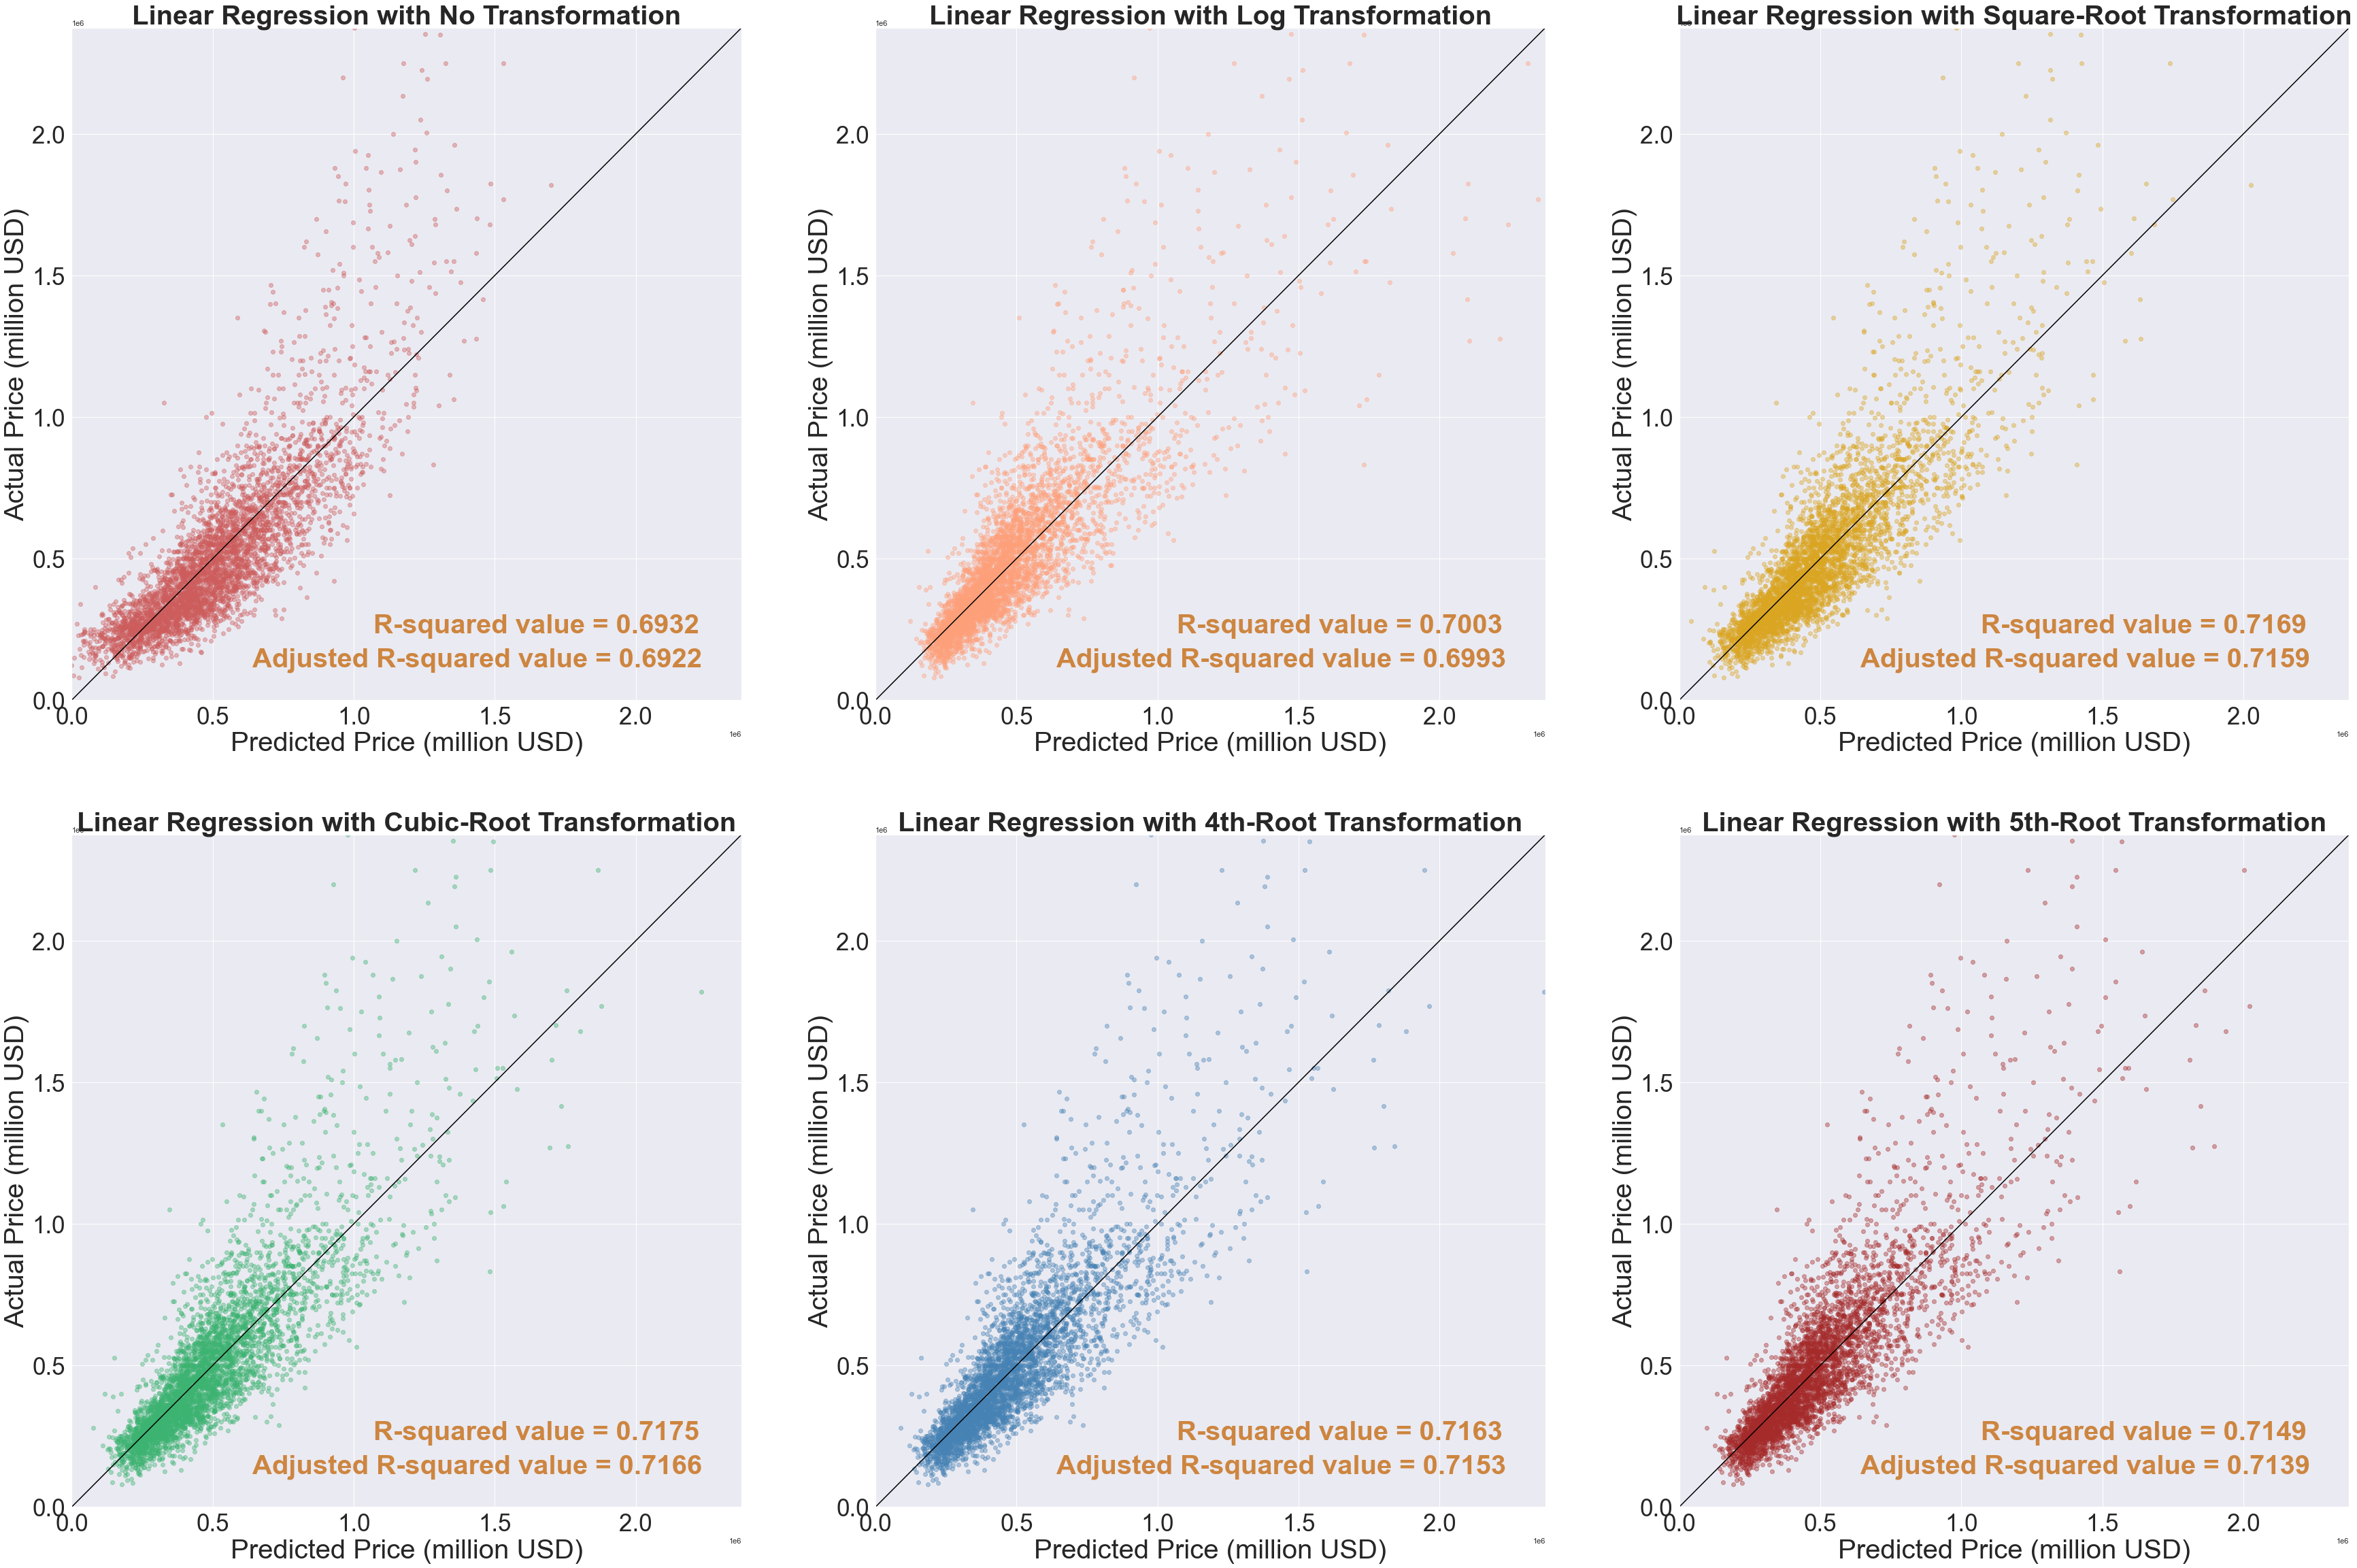

In [15]:
from sklearn.linear_model import LinearRegression

# Price vs predictors
LRnormal         = LinearRegression()
LRnormal.fit(x_train_scaled_df, y_train['price'])
LRnormal_ypred   = LRnormal.predict(x_test_scaled_df)

# Log transformation
LRlog            = LinearRegression()
LRlog.fit(x_train_scaled_df, y_train['log_price'])
LRlog_ypred      = LRlog.predict(x_test_scaled_df)

# Square root transformation
LRsqrt           = LinearRegression()
LRsqrt.fit(x_train_scaled_df, y_train['sqrt_price'])
LRsqrt_ypred     = LRsqrt.predict(x_test_scaled_df)

# Cubic root transformation
LRcbrt           = LinearRegression()
LRcbrt.fit(x_train_scaled_df, y_train['cbrt_price'])
LRcbrt_ypred     = LRcbrt.predict(x_test_scaled_df)

# Fourth root transformation
LR4th            = LinearRegression()
LR4th.fit(x_train_scaled_df, y_train['4th_root'])
LR4th_ypred      = LR4th.predict(x_test_scaled_df)

# Fifth root transformation
LR5th            = LinearRegression()
LR5th.fit(x_train_scaled_df, y_train['5th_root'])
LR5th_ypred      = LR5th.predict(x_test_scaled_df)

# Displaying the predicted values vs actual values, and the feature importance
def f(x):
    return x

x                = np.linspace(0, y_test['price'].max())
LR               = [ LRnormal, LRlog, LRsqrt, LRcbrt, LR4th, LR5th ]
LR_list          = [ LRnormal_ypred            , 
                     np.exp  (LRlog_ypred)     , 
                     np.power(LRsqrt_ypred, 2) , 
                     np.power(LRcbrt_ypred, 3) ,
                     np.power(LR4th_ypred,  4) ,
                     np.power(LR5th_ypred,  5) ]
LR_title         = ['Linear Regression with No Transformation'         ,
                    'Linear Regression with Log Transformation'        ,
                    'Linear Regression with Square-Root Transformation',
                    'Linear Regression with Cubic-Root Transformation' ,
                    'Linear Regression with 4th-Root Transformation'   ,
                    'Linear Regression with 5th-Root Transformation'   ]
LR_color         = ['indianred', 'lightsalmon', 'goldenrod', 'mediumseagreen', 'steelblue', 'brown']

LR_cols          = 3
LR_rows          = int(np.ceil(len(LR_title)/LR_cols))
fig, axes        = plt.subplots(ncols = LR_cols, nrows = LR_rows, figsize=(60, 40))

from sklearn.metrics import r2_score

for i, method in enumerate(LR_list):
    axes[i//LR_cols,i%LR_cols].scatter     (LR_list[i], y_test['price'], c = LR_color[i], alpha = 0.4)
    axes[i//LR_cols,i%LR_cols].plot        (x, f(x), color = 'black')
    axes[i//LR_cols,i%LR_cols].set_xlim    ([0, y_test['price'].max()])
    axes[i//LR_cols,i%LR_cols].set_ylim    ([0, y_test['price'].max()])
    axes[i//LR_cols,i%LR_cols].set_title   (LR_title[i]                    , fontsize  = 40, fontweight = 'bold')
    axes[i//LR_cols,i%LR_cols].set_xlabel  ('Predicted Price (million USD)', fontsize  = 40)
    axes[i//LR_cols,i%LR_cols].set_ylabel  ('Actual Price (million USD)'   , fontsize  = 40)
    axes[i//LR_cols,i%LR_cols].tick_params (axis = 'x'                     , labelsize = 35)
    axes[i//LR_cols,i%LR_cols].tick_params (axis = 'y'                     , labelsize = 35)
    axes[i//LR_cols,i%LR_cols].annotate    ('R-squared value = ' + str(round(r2_score(y_test['price'], LR_list[i]), 4)),
                                             xy = (0.45*y_test['price'].max(), 0.1*y_test['price'].max()), fontsize = 40, 
                                             fontweight = 'bold', color = 'peru')
    LR_adj_Rsquared = 1 - (1-r2_score(y_test['price'], LR_list[i]))* (len(y_test['price']) - 1 ) / ( len(y_test['price']) - x_test.shape[1] - 1 )
    axes[i//LR_cols,i%LR_cols].annotate    ('Adjusted R-squared value = ' + str(round(LR_adj_Rsquared, 4)),
                                             xy = (0.27*y_test['price'].max(), 0.05*y_test['price'].max()), fontsize = 40, 
                                             fontweight = 'bold', color = 'peru')
    
for result in LR_list:
    results.append(result)

# Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Second degree polynomial
PR2                = PolynomialFeatures(degree = 2)
PR_2               = LinearRegression()
x_poly_2           = PR2.fit_transform(x_train)
PR_2.fit(x_poly_2, y_train['price'])
x_poly_2_test      = PR2.transform(x_test)
PR2_ypred          = PR_2.predict(x_poly_2_test)

# Third degree polynomial
PR3                = PolynomialFeatures(degree = 3)
PR_3               = LinearRegression()
x_poly_3           = PR3.fit_transform(x_train)
PR_3.fit(x_poly_3, y_train['price'])
x_poly_3_test      = PR3.transform(x_test)
PR3_ypred          = PR_3.predict(x_poly_3_test)

# Fourth degree polynomial
PR4                = PolynomialFeatures(degree = 4)
PR_4               = LinearRegression()
x_poly_4           = PR4.fit_transform(x_train)
PR_4.fit(x_poly_4, y_train['price'])
x_poly_4_test      = PR4.transform(x_test)
PR4_ypred          = PR_4.predict(x_poly_4_test)

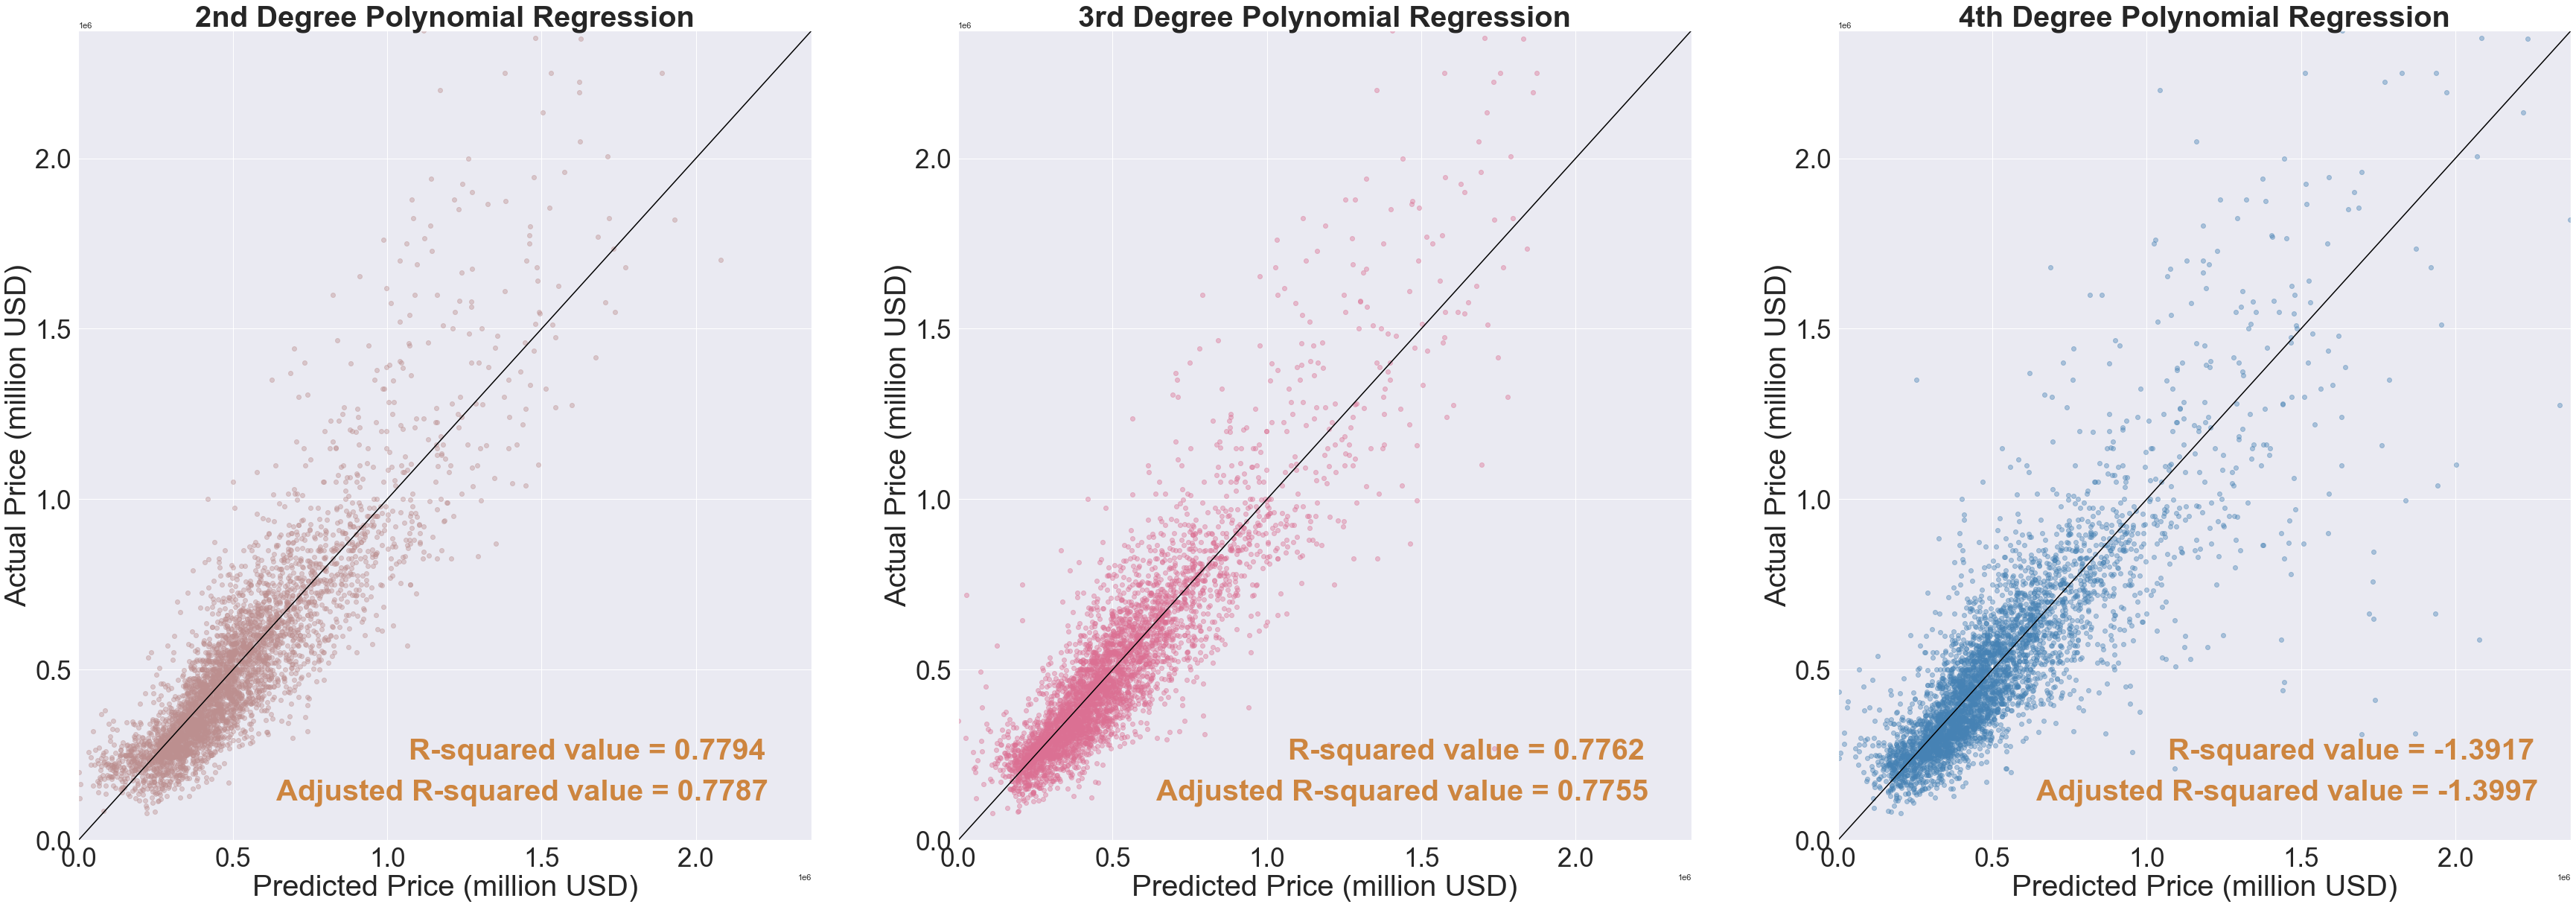

In [17]:
# Creating the plot
PR               = [ PR2, PR3, PR4 ]
PR_list          = [ PR2_ypred, PR3_ypred, PR4_ypred ]
PR_title         = ['2nd Degree Polynomial Regression',
                    '3rd Degree Polynomial Regression',
                    '4th Degree Polynomial Regression' ]
PR_color         = ['rosybrown', 'palevioletred', 'steelblue']
PR_cols          = 3
PR_rows          = int(np.ceil(len(PR_title)/PR_cols))
fig, axes        = plt.subplots(ncols = PR_cols, nrows = PR_rows, figsize=(60, 20))

for i, method in enumerate(PR_list):
    axes[i%PR_cols].scatter     (PR_list[i], y_test['price'], c = PR_color[i], alpha = 0.4)
    axes[i%PR_cols].plot        (x, f(x), color = 'black')
    axes[i%PR_cols].set_xlim    ([0, y_test['price'].max()])
    axes[i%PR_cols].set_ylim    ([0, y_test['price'].max()])
    axes[i%PR_cols].set_title   (PR_title[i]                    , fontsize  = 40, fontweight = 'bold')
    axes[i%PR_cols].set_xlabel  ('Predicted Price (million USD)', fontsize  = 40)
    axes[i%PR_cols].set_ylabel  ('Actual Price (million USD)'   , fontsize  = 40)
    axes[i%PR_cols].tick_params (axis = 'x'                     , labelsize = 35)
    axes[i%PR_cols].tick_params (axis = 'y'                     , labelsize = 35)
    axes[i%PR_cols].annotate    ('R-squared value = ' + str(round(r2_score(y_test['price'], PR_list[i]), 4)),
                                 xy = (0.45*y_test['price'].max(), 0.1*y_test['price'].max()), fontsize = 40, 
                                 fontweight = 'bold', color = 'peru')
    LR_adj_Rsquared = 1 - (1-r2_score(y_test['price'], PR_list[i]))* (len(y_test['price']) - 1 ) / ( len(y_test['price']) - x_test.shape[1] - 1 )
    axes[i%PR_cols].annotate    ('Adjusted R-squared value = ' + str(round(LR_adj_Rsquared, 4)),
                                 xy = (0.27*y_test['price'].max(), 0.05*y_test['price'].max()), fontsize = 40, 
                                 fontweight = 'bold', color = 'peru')
    
for result in PR_list:
    results.append(result)

# Support Vector Regression

In [18]:
from sklearn.preprocessing import StandardScaler

svr_method_list      = ['linear', 'poly', 'rbf', 'sigmoid']
svr_results          = []
from sklearn.svm import SVR

for method in (svr_method_list):
    svr              = SVR(kernel = method)
    svr.fit(x_train_scaled, y_train_scaled)
    svr_y_pred       = svr.predict(x_test_scaled)
    svr_ypred        = ssy.inverse_transform(svr_y_pred.reshape(-1, 1))
    svr_results.append(svr_ypred)
    results.append(svr_ypred)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

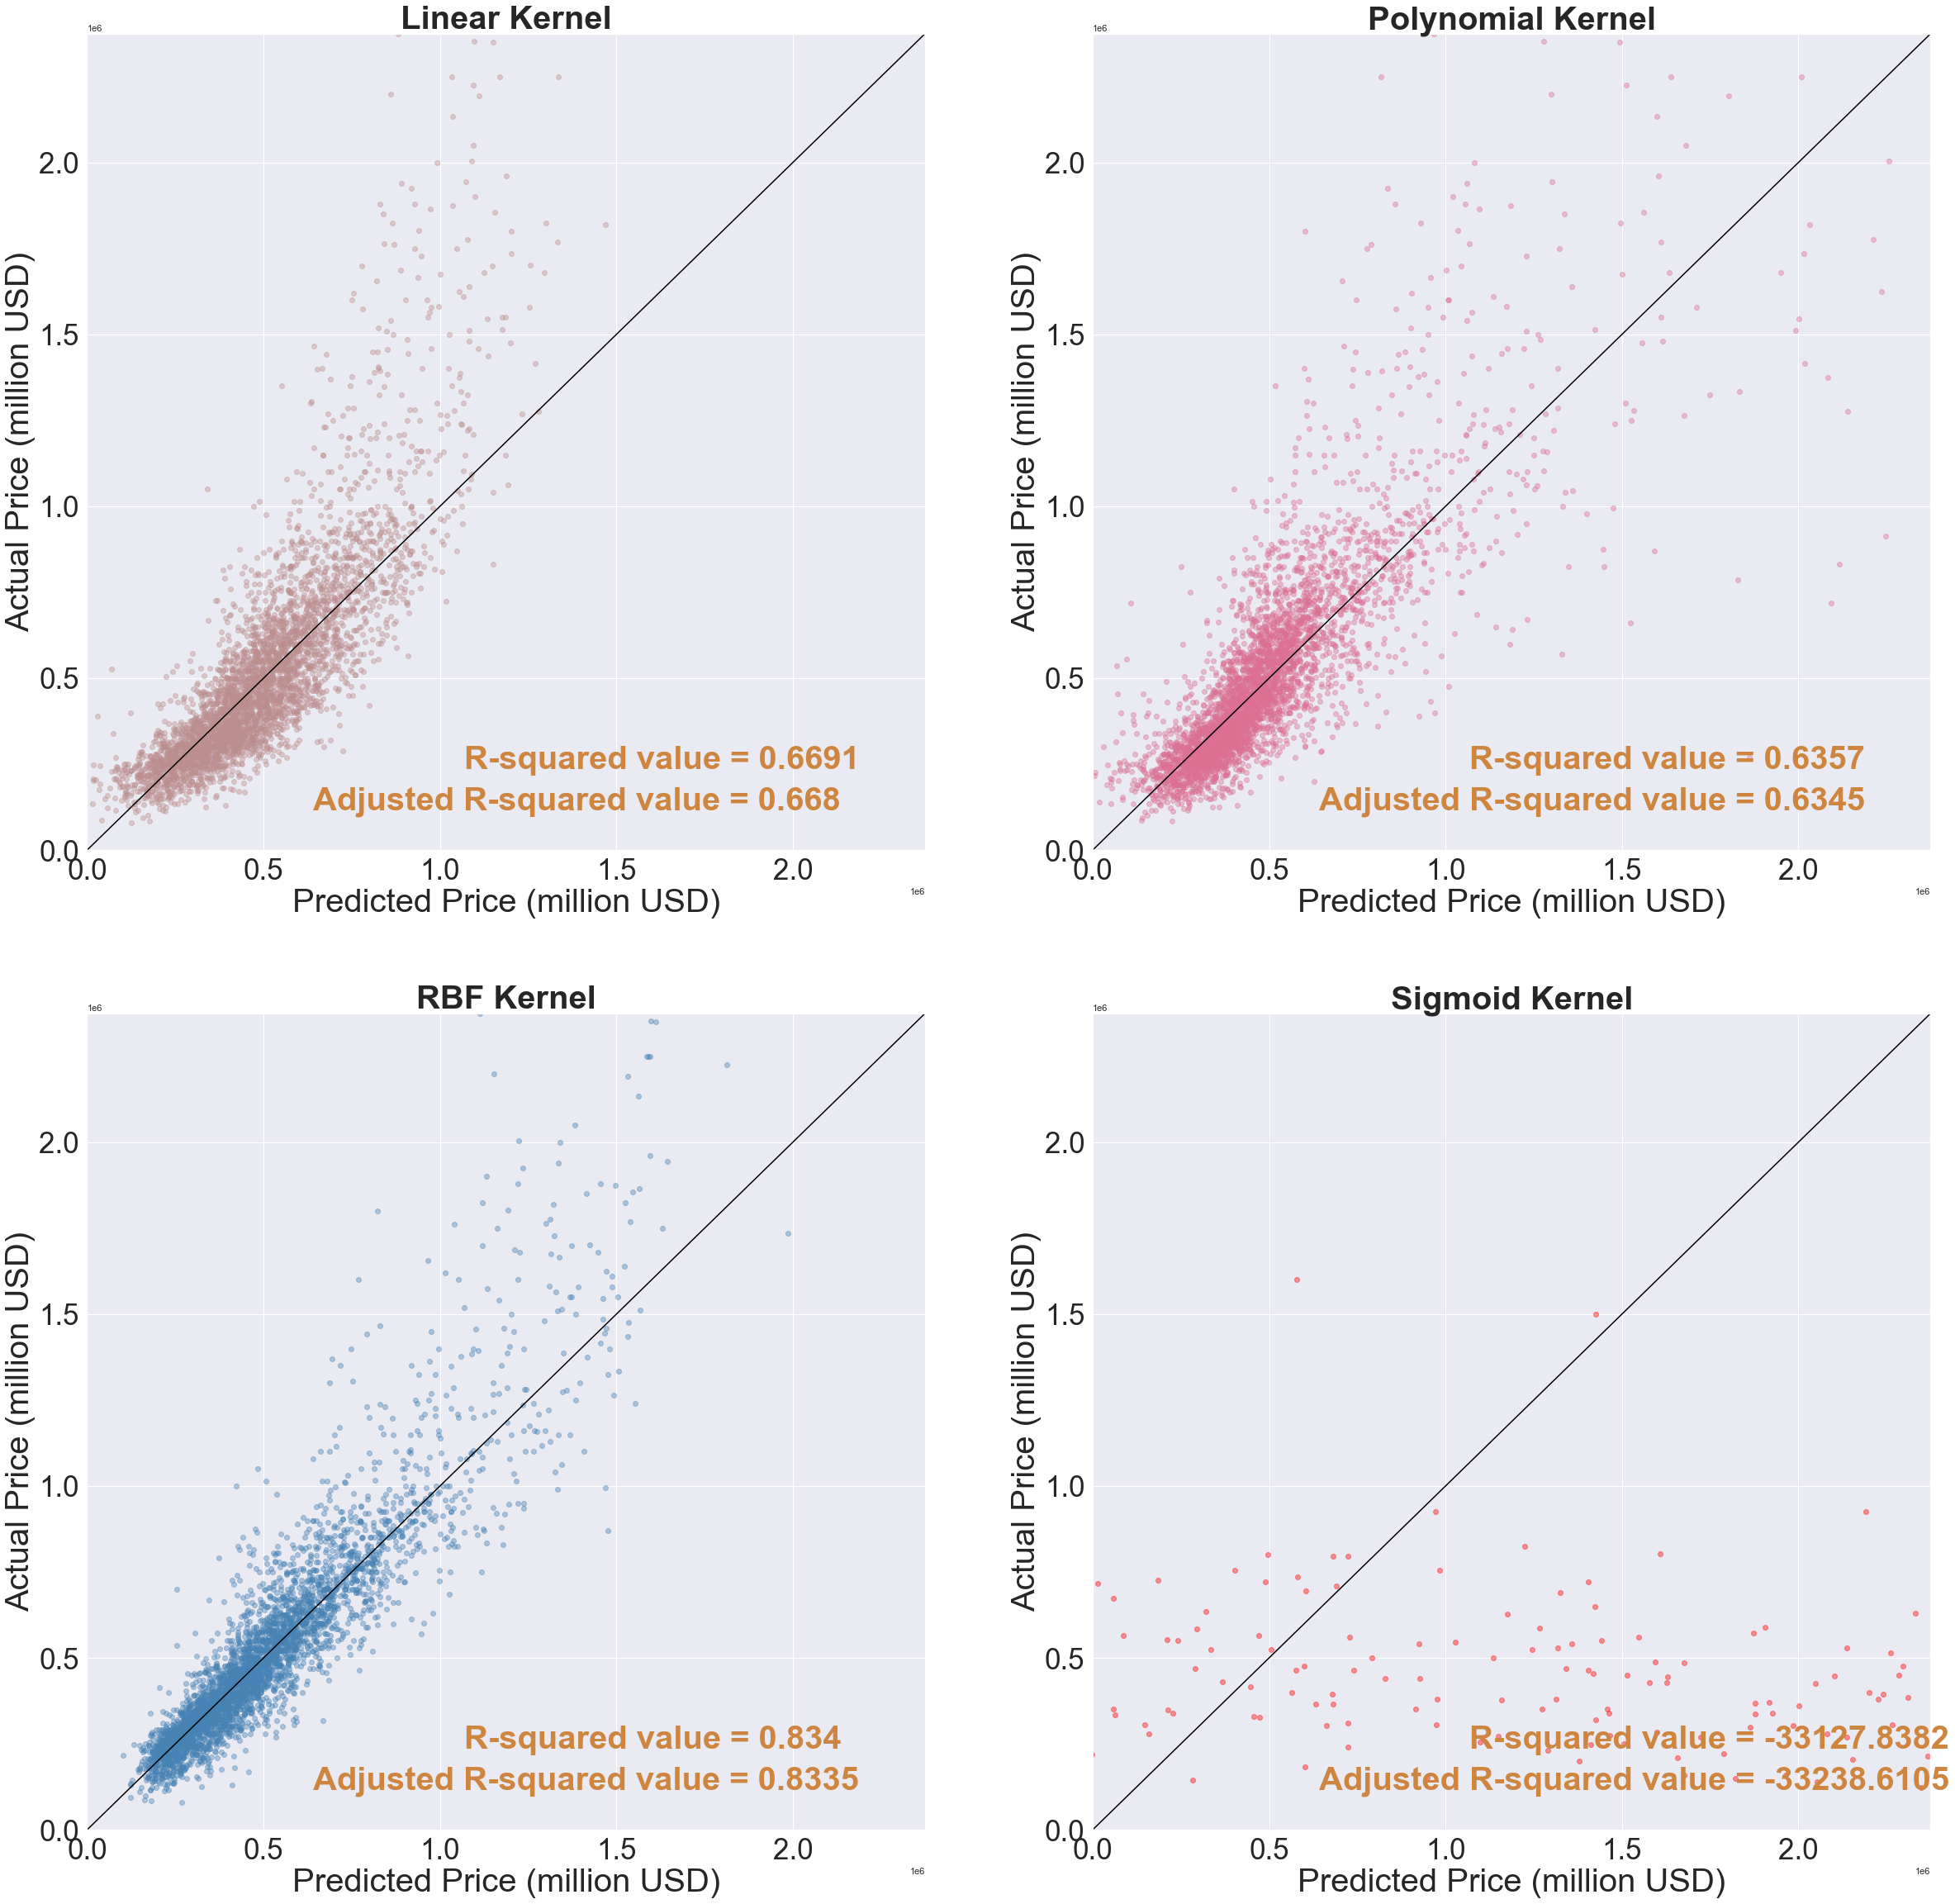

In [19]:
# Creating the plot
SVR_title         = ['Linear Kernel',
                     'Polynomial Kernel',
                     'RBF Kernel',
                     'Sigmoid Kernel']
SVR_color         = ['rosybrown', 'palevioletred', 'steelblue', 'red']
SVR_cols          = 2
SVR_rows          = int(np.ceil(len(SVR_title)/SVR_cols))
fig, axes         = plt.subplots(ncols = SVR_cols, nrows = SVR_rows, figsize=(40, 40))

for i, result in enumerate(svr_results):
    axes[i//SVR_cols,i%SVR_cols].scatter     (result, y_test['price'], c = SVR_color[i], alpha = 0.4)
    axes[i//SVR_cols,i%SVR_cols].plot        (x, f(x), color = 'black')
    axes[i//SVR_cols,i%SVR_cols].set_xlim    ([0, y_test['price'].max()])
    axes[i//SVR_cols,i%SVR_cols].set_ylim    ([0, y_test['price'].max()])
    axes[i//SVR_cols,i%SVR_cols].set_title   (SVR_title[i]                   , fontsize  = 40, fontweight = 'bold')
    axes[i//SVR_cols,i%SVR_cols].set_xlabel  ('Predicted Price (million USD)', fontsize  = 40)
    axes[i//SVR_cols,i%SVR_cols].set_ylabel  ('Actual Price (million USD)'   , fontsize  = 40)
    axes[i//SVR_cols,i%SVR_cols].tick_params (axis = 'x'                     , labelsize = 35)
    axes[i//SVR_cols,i%SVR_cols].tick_params (axis = 'y'                     , labelsize = 35)
    axes[i//SVR_cols,i%SVR_cols].annotate    ('R-squared value = ' + str(round(r2_score(y_test['price'], result), 4)),
                                             xy = (0.45*y_test['price'].max(), 0.1*y_test['price'].max()), fontsize = 40, 
                                             fontweight = 'bold', color = 'peru')
    LR_adj_Rsquared = 1 - (1-r2_score(y_test['price'], svr_results[i]))* (len(y_test['price']) - 1 ) / ( len(y_test['price']) - x_test.shape[1] - 1 )
    axes[i//SVR_cols,i%SVR_cols].annotate    ('Adjusted R-squared value = ' + str(round(LR_adj_Rsquared, 4)),
                                             xy = (0.27*y_test['price'].max(), 0.05*y_test['price'].max()), fontsize = 40, 
                                             fontweight = 'bold', color = 'peru')

# Decision Tree Regression

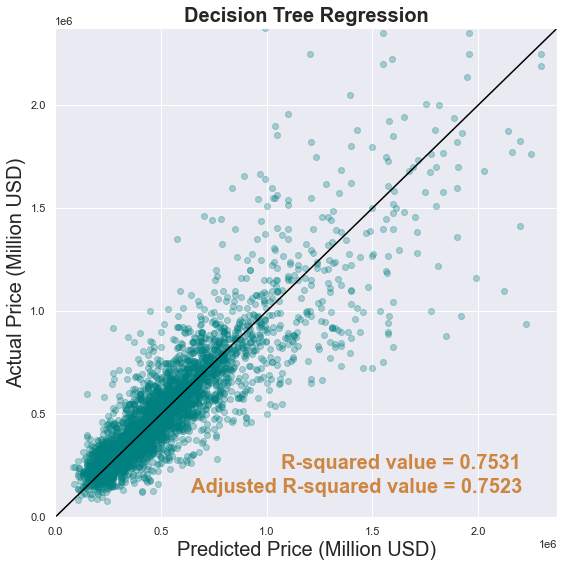

In [20]:
from sklearn.tree import DecisionTreeRegressor

DTR          = DecisionTreeRegressor()
DTR.fit(x_train, y_train['price'])
DTR_ypred    = DTR.predict(x_test)
LR_adj_Rsquared = 1 - (1-r2_score(y_test['price'], DTR_ypred))* (len(y_test['price']) - 1 ) / ( len(y_test['price']) - x_test.shape[1] - 1 )

plt.figure    (figsize = (9, 9))
plt.scatter   (DTR_ypred, y_test['price'], c = 'teal', alpha = 0.3)
plt.plot      (x, f(x), color = 'black')
plt.xlim      ([0, y_test['price'].max()])
plt.ylim      ([0, y_test['price'].max()])
plt.annotate  ('R-squared value = ' + str(round(r2_score(y_test['price'], DTR_ypred), 4)),
               xy = (0.45*y_test['price'].max(), 0.1*y_test['price'].max()), 
               fontsize = 20, fontweight = 'bold', color = 'peru')
plt.annotate  ('Adjusted R-squared value = ' + str(round(LR_adj_Rsquared, 4)),
                xy = (0.27*y_test['price'].max(), 0.05*y_test['price'].max()), 
                fontsize = 20, fontweight = 'bold', color = 'peru')
plt.xlabel    ('Predicted Price (Million USD)', fontsize = 20)
plt.ylabel    ('Actual Price (Million USD)'   , fontsize = 20)
plt.title     ('Decision Tree Regression'     , fontsize = 20, fontweight = 'bold')
plt.show()

results.append(DTR_ypred)

# Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

RFR_treecount = 2000
RFR           = RandomForestRegressor(n_estimators = RFR_treecount)
RFR.fit(x_train, y_train['price'])
RFR_y_pred    = RFR.predict(x_test)

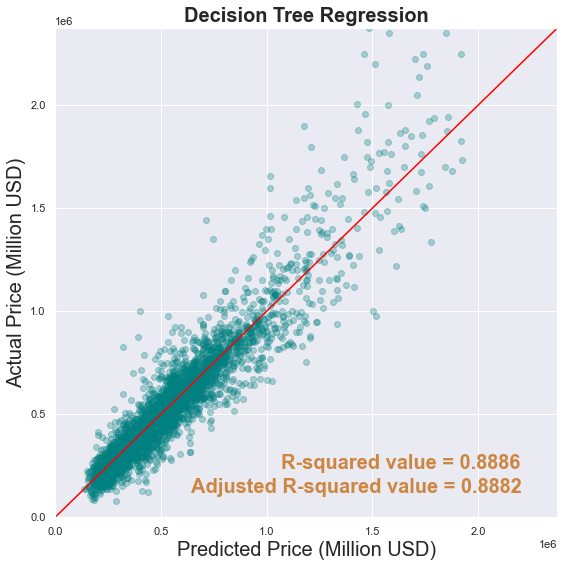

In [168]:
LR_adj_Rsquared = 1 - (1-r2_score(y_test['price'], RFR_y_pred))* (len(y_test['price']) - 1 ) / ( len(y_test['price']) - x_test.shape[1] - 1 )

plt.figure    (figsize = (9, 9))
plt.scatter   (RFR_y_pred, y_test['price'], c = 'teal', alpha = 0.3)
plt.plot      (x, f(x), color = 'red')
plt.xlim      ([0, y_test['price'].max()])
plt.ylim      ([0, y_test['price'].max()])
plt.annotate  ('R-squared value = ' + str(round(r2_score(y_test['price'], RFR_y_pred), 4)),
               xy = (0.45*y_test['price'].max(), 0.1*y_test['price'].max()), 
               fontsize = 20, fontweight = 'bold', color = 'peru')
plt.annotate  ('Adjusted R-squared value = ' + str(round(LR_adj_Rsquared, 4)),
                xy = (0.27*y_test['price'].max(), 0.05*y_test['price'].max()), 
                fontsize = 20, fontweight = 'bold', color = 'peru')
plt.xlabel    ('Predicted Price (Million USD)', fontsize = 20)
plt.ylabel    ('Actual Price (Million USD)'   , fontsize = 20)
plt.title     ('Decision Tree Regression'     , fontsize = 20, fontweight = 'bold')
plt.show()
results.append(RFR_y_pred)

# Summary

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

methods = ['LR, no transformation',
           'LR, log transformation',
           'LR, sqrt transformation',
           'LR, cbrt transformation',
           'LR, 4th root transformation',
           'LR, 5th root transformation',
           'PR, 2nd degree',
           'PR, 3rd degree',
           'PR, 4rd degree',
           'SVR, linear kernel',
           'SVR, poly kernel',
           'SVR, rbf kernel',
           'SVR, sigmoid kernel',
           'DTR',
           'RFR, 2000 trees']
r2      = []
adj_r2  = []
RMSE    = []
MAE     = []
for i, method in enumerate(methods):
    r2.    append(r2_score(y_test['price'], results[i]))
    adj_r2.append(1 - (1-r2_score(y_test['price'], results[i]))* (len(y_test['price']) - 1 ) / ( len(y_test['price']) - x_test.shape[1] - 1 ))
    RMSE.  append(np.sqrt(mean_squared_error(y_test['price'], results[i])))
    MAE.   append(mean_absolute_error(y_test['price'], results[i]))
    

In [24]:
results_parameters = pd.DataFrame({'Method'                 : methods,
                                   'R-squared'              : r2     ,
                                   'Adj R-squared'          : adj_r2 ,
                                   'Root Mean Squared Error': RMSE   ,
                                   'Mean Absolute Error'    : MAE}
                                 )
results_parameters = results_parameters[results_parameters['R-squared'] >= 0]
results_parameters = results_parameters.reset_index(drop = True)

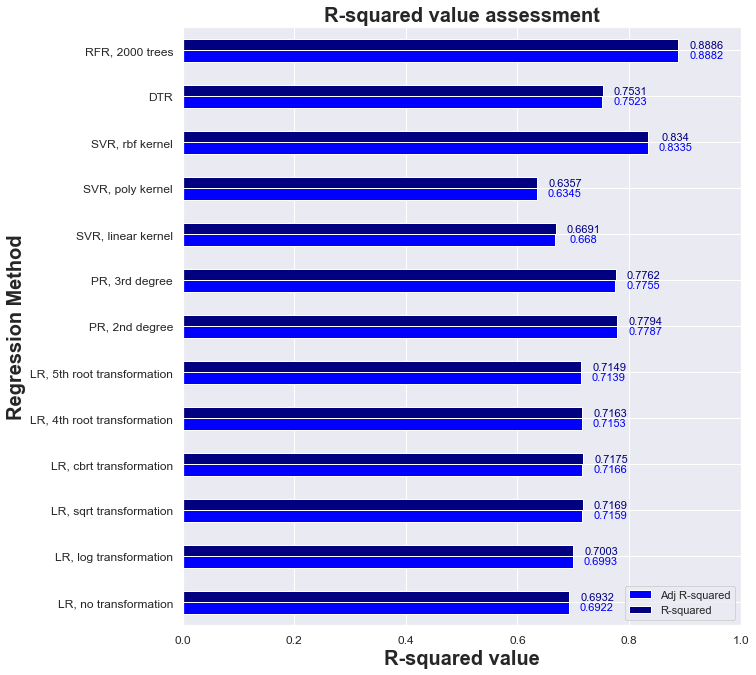

In [188]:
results_parameters.plot.barh(x = 'Method', 
                             y = ['Adj R-squared', 'R-squared'], 
                             color = ['blue', 'navy'], 
                             figsize = (10, 11))
plt.title       ('R-squared value assessment', fontsize = 20, fontweight = 'bold')
plt.ylabel      ('Regression Method', fontsize = 20, fontweight = 'bold')
plt.xlabel      ('R-squared value'  , fontsize = 20, fontweight = 'bold')
plt.xlim        (0, 1)
plt.tick_params (axis = 'x', labelsize = 12)
plt.tick_params (axis = 'y', labelsize = 12)

x               = results_parameters['Method']       .tolist()
y_rsquared      = results_parameters['R-squared']    .values.tolist()
y_adj_rsquared  = results_parameters['Adj R-squared'].values.tolist()

width1 = 0.05
width2 = 0.18
for i in range(len(x)):
    plt.text(y_rsquared[i]     + width1, i + width1, round(y_rsquared[i], 4)    , ha = 'center', c = 'navy' , fontsize = 11)
    plt.text(y_adj_rsquared[i] + width1, i - width2, round(y_adj_rsquared[i], 4), ha = 'center', c = 'blue' , fontsize = 11)
plt.show        ()

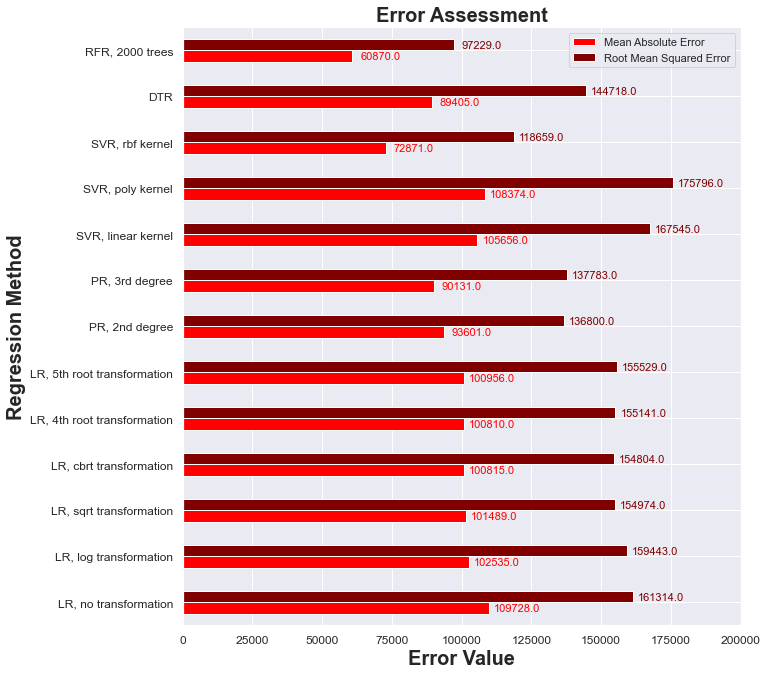

In [185]:
results_parameters.plot.barh(x = 'Method', 
                             y = ['Mean Absolute Error', 'Root Mean Squared Error'], 
                             color = ['red', 'maroon'], 
                             figsize = (10, 11))
plt.title       ('Error Assessment' , fontsize = 20, fontweight = 'bold')
plt.ylabel      ('Regression Method', fontsize = 20, fontweight = 'bold')
plt.xlabel      ('Error Value'      , fontsize = 20, fontweight = 'bold')
plt.xlim        (0, 200000)
plt.tick_params (axis = 'x', labelsize = 12)
plt.tick_params (axis = 'y', labelsize = 12)

y_RMSE      = results_parameters['Root Mean Squared Error'].values.tolist()
y_MAE       = results_parameters['Mean Absolute Error']    .values.tolist()

width3 = 10000
width4 = 0.05
width5 = 0.2
for i in range(len(x_rsquared)):
    plt.text(y_RMSE[i] + width3, i + width4, round(y_RMSE[i], 0), ha = 'center', c = 'maroon' , fontsize = 11)
    plt.text(y_MAE [i] + width3, i - width5, round(y_MAE [i], 0), ha = 'center', c = 'red'    , fontsize = 11)
plt.show        ()

#### Hence, the Random Forest Regression mwith 2000 Trees model best suits the prediction of the house prices, with R-squared value of over 0.88 and a significant difference in error value in comparison with other methods.